# Deep Learning NoteBook: Chapter 03

Author: Shahrokh Abbasi-Rad

Date: 18 November 2019

Source: An online course on DataCamp Website (Deep Learning in Python)

https://www.datacamp.com/home

<br>
<br>

<div align='center'>
    <font size=5, color='#003366'>
        <b>Model Optimization Challenges</b>
    </font>
    </div>

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        <br> اول داده های مربوط به پیش بینی دستمزد رو دوباره برای این نوت بوک لود می کنم چون باهاشون کار دارم
        

In [14]:
import csv
import numpy as np
import pandas as pd

with open('wage_data.csv', 'r') as f:
    wages = list(csv.reader(f, delimiter=' '))

tidy_data = np.zeros((534, 10), dtype=np.float)


for row_counter in range(1, 534):
    element = wages[row_counter]
    column_counter = 0
    real_counter = -1
    for point in element:

        if point != '':
            column_counter = column_counter + 1
            if column_counter is 1:
                pass
            elif column_counter is 9:
                pass
            else:
                real_counter = real_counter + 1
                tidy_data[row_counter, real_counter] = float(point)

tidy_tidy_1 = tidy_data[1:,:]
headers = wages[0]
column_counter = -1

clean_data = pd.DataFrame(tidy_tidy_1)
header_list = []

for i in range(1, len(headers)):
        if headers[i] is not'':
            if headers[i] is not '\\,':
                header_list.append(headers[i])
header_list.remove('\\,')
clean_data.columns = header_list
clean_data.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0.0,8.0,21.0,35.0,1.0,1.0,0.0,1.0,0.0
1,4.95,0.0,9.0,42.0,57.0,1.0,1.0,0.0,1.0,0.0
2,6.67,0.0,12.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0
3,4.00,0.0,12.0,4.0,22.0,0.0,0.0,0.0,0.0,0.0
4,7.50,0.0,12.0,17.0,35.0,0.0,1.0,0.0,0.0,0.0


In [22]:
dataset = clean_data.to_numpy()
predictors = dataset[:,1:10]
target = dataset[:,0]
n_col = predictors.shape[1]
print(n_col)

9


<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
    <br> در این بحث می خوایم ببینیم که چطور می تونیم آپتیمیزیشن رو بهتر کنیم
        <br> با یه مثال شروع میکنیم که ببینیم لرنینگ ریت چه تاثیری بر بهینه سازی مون داره. از اُپتیمایزر استوکستیک گرادیان دیسنت استفاده می کنیم چون این اُپتیمایزر از لرنینگ ریت ثابت استفاده میکنه
    </font>
     </div>

In [27]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

def get_new_model(input_net):
    model = Sequential()
    model.add(Dense(100, activation = 'relu', input_shape = input_net))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(1))
    return(model)
        
# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.001, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model((n_col,))
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss='mean_squared_error')
    
    # Fit the model
    model.fit(predictors, target, epochs = 5)




Testing model with learning rate: 0.000001

Epoch 1/5
533/533 [==============================] - 0s 122us/step - loss: 167.3054
Epoch 2/5
533/533 [==============================] - 0s 25us/step - loss: 139.9127
Epoch 3/5
533/533 [==============================] - 0s 25us/step - loss: 118.1421
Epoch 4/5
533/533 [==============================] - 0s 33us/step - loss: 100.9175
Epoch 5/5
533/533 [==============================] - 0s 26us/step - loss: 87.5033


Testing model with learning rate: 0.001000

Epoch 1/5
533/533 [==============================] - 0s 116us/step - loss: 122.9000
Epoch 2/5
533/533 [==============================] - 0s 36us/step - loss: 32.8039
Epoch 3/5
533/533 [==============================] - 0s 28us/step - loss: 28.9340
Epoch 4/5
533/533 [==============================] - 0s 26us/step - loss: 24.3435
Epoch 5/5
533/533 [==============================] - 0s 26us/step - loss: 24.3014


Testing model with learning rate: 1.000000

Epoch 1/5
533/533 [================

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        <br> خب اینجا تاثیر لرنینگ ریت رو داریم می بینیم. خیلی کوچی، بعد از پنج تا ایپوک ما رو به جایی نمی بره. لرنینگ ریت بزرگ هم که کلا کار نمی کنه. ولی لرنینگ ریت یک هزارم خوب کار کرد

<br>
<br>
<div align='center'>
    <font size=4, color='#003366'>
        <b>Dying Neuron</b>
    </font>
    </div>
<br>

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        بعضی وقت ها پیش میاد که همه ی ورودی هایی که به یه نورون میرسند منفی باشند، بنابراین اون نورون همیشه صفر خواهد بود و شیب هم براش همیشه صفر خواهد بود و اون نورون هیچ وقت وزن هاش آپدیت نمی شوند. بنابراین اصطلاحا می گویند اون نورون یه نورون مرده هست. این معمولا وقتی اتفاق. میفته که اکنیویشن فانکشن تابع رِلیو هست

<br>
<br>
<br>
        
<div align='center'>
    <font size=4, color='#003366'>
        <b> Vanishing Gradients</b>
    </font>
    </div>
<br>

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        حالا فرض کن برای اینکه از این نورون های مرده فرار کنیم، میایم و تابع اکتیویشن رو تانژانت هایپربولیک می ذاریم. این تابع اس شکل اجازه نمیده نورونی تبدیل به نورون مرده شود ولی خب خودش مساله ی دیگه ای رو برای ما ایجاد میکنه.
        <br> اون قسمت های اول و آخرش باعث میشه که آپدیت کردن وزن ها بعد از یه مدتی اشباع بشه و دیگه اصلا گرادیانی وجود نداشته باشه در فضای سرچ که ما بخواهیم بر اساس اون بالا و پائین بریم
        <br>ممکنه که این تانژانت توی نتوورک های معمولی کار کنه ولی وقتی کلی لایه های دیپ داریم. نه. کار نخواهد کرد
        <br> معمولا می گن باید بگردی دنبال یه اکتیویشن فانکشنی که هیچ جا فلت نشه
        <br> <b> جمع بندی</b>
        <br> اینجا فقط اومدیم بگیم که چقدر آپتیمیزشن که در واقع دغدغه ی اول ما توی دیپ لرنینگ هست می تونه پیچیده باشه.


<div align='center'>
    <font size=5, color='#003366'>
        <b>Model Validation</b>
    </font>
    </div>

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        <br> مساله ی ما اینه که اون چیزی که ته ترینینگ مدلت به عنوان عملکرد مدل اعلام می کنی، به هیچ عنوان بیانگر میزان خفنی مدل تو نیست. بلکه باید عملکردشو زمانی ببینی که می خواد داده ای که قبلا ندیده رو هندل کنه. برای همین یه بخشی از داده ای که داریم رو کنار میذاریم برای ولیدیشن مدلمون که به اون داده می گیم داده ی ولیدیشن. 
        <br> در واقع می خوایم ببینیم قدرت جنرالایز کردن مدلمون چقدره؟
        <br> یه چیزی داریم به اسم 
        <br> k-fold cross validation
        <br> در عمل خیلی کم آدمی پیدا میشه که کی فولد کراس ولیدیشن انجام بده. چرا؟ چون به شدت زمان بره. و به همین خاطر ما معمولا به یک تک ولیدیشن بسنده می کنیم و به یک ران ولیدیشن بسنده میکنیم
        <br>  
        <br> جالا جالب اینجاست که کراس چقدر کار رو راحت کرده. شما اگه یادت باشه کار ترینینگ رو با تابع فیت انجام می دادیم. خب کار تمومه دیگه. همین تابع فیت یه آرگومان میگیره که ازون طریق  بهش می گی آقا جان این داده هایی که من دادم بهت فلان درصدش رو بذار کنار برای ولیدیشن و با بقیه ش مدل رو ترین کن مثلا در مثال زیر میگیم ۳۰ درصد رو بذار کنار برای ولیدیشن
        <br> model.fit(predictors, target, validation_split=0.3)
        <br>
        <br>
        <br> اینجا یه مدل رو دو بار ترین می کنم. یه بار با کل دیتا و یه بار ۳۰ درصد دیتا رو برای ولیدیشن میذارم کنار و با ۷۰ درصد دیتا مدل رو ترین می کنم

In [32]:
model = get_new_model((n_col,))
my_optimizer = SGD(lr=0.0001)
model.compile(optimizer = my_optimizer, loss='mean_squared_error')
model.fit(predictors, target, epochs = 5)


Epoch 1/5
533/533 [==============================] - 0s 115us/step - loss: 50.8864
Epoch 2/5
533/533 [==============================] - 0s 35us/step - loss: 24.4823
Epoch 3/5
533/533 [==============================] - 0s 29us/step - loss: 23.2116
Epoch 4/5
533/533 [==============================] - 0s 28us/step - loss: 22.4190
Epoch 5/5
533/533 [==============================] - 0s 27us/step - loss: 21.9727


In [33]:
model = get_new_model((n_col,))
my_optimizer = SGD(lr=0.0001)
model.compile(optimizer = my_optimizer, loss='mean_squared_error')
model.fit(predictors, target, epochs = 5, validation_split=0.3)

Train on 373 samples, validate on 160 samples
Epoch 1/5
373/373 [==============================] - 0s 180us/step - loss: 29.3637 - val_loss: 35.2789
Epoch 2/5
373/373 [==============================] - 0s 38us/step - loss: 23.7267 - val_loss: 33.6274
Epoch 3/5
373/373 [==============================] - 0s 32us/step - loss: 22.4212 - val_loss: 32.0262
Epoch 4/5
373/373 [==============================] - 0s 34us/step - loss: 22.4921 - val_loss: 30.4741
Epoch 5/5
373/373 [==============================] - 0s 34us/step - loss: 20.8435 - val_loss: 27.9886


<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        حالا که اینکارو کردیم کراس به ما یه چیزی میده به نام ولیدیشن اسکور. حالا ما از طریق اون می تونیم تصمیم بگیریم که کِی می خوایم ترینینگ رو استاپ کنیم. در واقع می تونیم در حین جلو بردن ایپوک ها  بعد از هر ایپوک ببینیم که ولیدیشن اسکور چطور پیش میره. اگه مثلا دو تا اپوک گذشت و ولیدیشن اسکور بهتر نشد خیلی بعیده که در ایپوک های بعدی بهتر بشه بنابراین پروسه ی ترینینگ رو قطع می کنیم
        <br> 
        <br> دوباره بر می گردیم به کراس. کراس همه ی کار ها رو راحت کرده. در واقع این کار به راحتی از طریق یه چیزی به اسم اِرلی استاپینگ انجام میگیره که من در کد زیر نحوه ی اعمالشو بهت میگم. یه آرگومان به اسم کال بک به تابع فیت میدی. این آرگومان به صورت یک لیست هست که اون ارلی استاپینگی که ساختی توش قرار می گیره 

In [35]:
from keras.callbacks import EarlyStopping
early_stoppping_monitor = EarlyStopping(patience=2)
model = get_new_model((n_col,))
my_optimizer = SGD(lr=0.0001)
model.compile(optimizer = my_optimizer, loss='mean_squared_error')
model.fit(predictors, target, epochs = 20, validation_split=0.3, callbacks=[early_stoppping_monitor])

Train on 373 samples, validate on 160 samples
Epoch 1/20
373/373 [==============================] - 0s 182us/step - loss: 37.3640 - val_loss: 36.6655
Epoch 2/20
373/373 [==============================] - 0s 37us/step - loss: 23.8339 - val_loss: 33.5320
Epoch 3/20
373/373 [==============================] - 0s 33us/step - loss: 22.0798 - val_loss: 32.3869
Epoch 4/20
373/373 [==============================] - 0s 45us/step - loss: 21.5491 - val_loss: 28.4648
Epoch 5/20
373/373 [==============================] - 0s 45us/step - loss: 20.8773 - val_loss: 28.8269
Epoch 6/20
373/373 [==============================] - 0s 40us/step - loss: 20.5445 - val_loss: 29.2388


<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        <br> اینجا بهش گفتم که ارلی استاپت دارای پارامتر صبری برابر با ۲ باشد. الآن شما اگه به ولیدیشن اسکور چهارم نگاه کنی برابر هست با تقریبا ۲۸.۵ ولی دو تا ایپوک بعد که رفته هیچ کدوم ازون بهتر نشدن بنابراین به این نتیجه رسیده که این ره که تو میروی  سرانجامی نداره. بنابراین استاپ میکنه
        <br> یه ماکسیوم ایپوک هم برات مشخص کردم
        <br>
        <br>
        <br> در ادامه می خوام بهت یاد بدم که چطور می تونی نمودار ترین شدم مدلت رو بکشی

In [38]:
# Creating Model 1
model_1 = Sequential()
model_1.add(Dense(100, activation='relu', input_shape = (n_col,)))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(1))

# Creating model 2
model_2 = Sequential()
model_2.add(Dense(100, activation='relu', input_shape = (n_col,)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1))

            
my_optimizer = SGD(lr=0.0001)
model_1.compile(optimizer = my_optimizer, loss='mean_squared_error')
model_2.compile(optimizer = my_optimizer, loss='mean_squared_error')

In [39]:
model_1_stats = model_1.fit(predictors, target, epochs = 20, validation_split=0.3, callbacks=[early_stoppping_monitor])

Train on 373 samples, validate on 160 samples
Epoch 1/20
373/373 [==============================] - 0s 182us/step - loss: 37.1703 - val_loss: 38.1882
Epoch 2/20
373/373 [==============================] - 0s 37us/step - loss: 25.0246 - val_loss: 37.4169
Epoch 3/20
373/373 [==============================] - 0s 36us/step - loss: 23.5910 - val_loss: 31.6948
Epoch 4/20
373/373 [==============================] - 0s 33us/step - loss: 22.3969 - val_loss: 29.6006
Epoch 5/20
373/373 [==============================] - 0s 36us/step - loss: 21.1359 - val_loss: 30.2553
Epoch 6/20
373/373 [==============================] - 0s 31us/step - loss: 20.9247 - val_loss: 28.8802
Epoch 7/20
373/373 [==============================] - 0s 31us/step - loss: 20.6065 - val_loss: 26.9864
Epoch 8/20
373/373 [==============================] - 0s 30us/step - loss: 20.3493 - val_loss: 27.8094
Epoch 9/20
373/373 [==============================] - 0s 30us/step - loss: 20.0791 - val_loss: 26.8170
Epoch 10/20
373/373 [=====

In [40]:
model_2_stats = model_1.fit(predictors, target, epochs = 20, validation_split=0.3, callbacks=[early_stoppping_monitor])

Train on 373 samples, validate on 160 samples
Epoch 1/20
373/373 [==============================] - 0s 40us/step - loss: 19.7236 - val_loss: 26.3422
Epoch 2/20
373/373 [==============================] - 0s 35us/step - loss: 19.5982 - val_loss: 25.4298
Epoch 3/20
373/373 [==============================] - 0s 32us/step - loss: 19.8522 - val_loss: 25.7154
Epoch 4/20
373/373 [==============================] - 0s 36us/step - loss: 19.8415 - val_loss: 25.5094


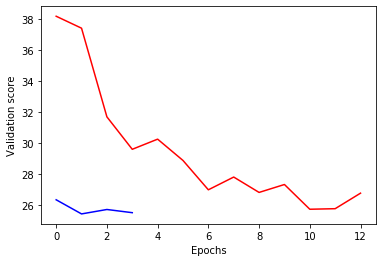

In [44]:
import matplotlib.pyplot as plt
plt.plot(model_1_stats.history['val_loss'], 'r', model_2_stats.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        <br> خب الآن این شبکه ی تو اینقدر خوب بود که توی چهار تا ایپوک به مراتب عملکرد بهتری نشون داد نسبت به مدل قبلی

<div align='center'>
    <font size=5, color='#003366'>
        <b>Model Capacity</b>
    </font>
    </div>

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        بحث بعدی بحث ظرفیت مدل هست. تاحالا یاد گرفتی که چطوری چندتا آرچیتکچر متفاوت برای مدل انتخاب کنی و اونها رو با هم مقایسه کنی. ولی خب مساله ی اصلی اینه که پیدا کردن بهترین مدل یه هنره و توی دیپ لرنینگ این خیلی سخت تر هست نسبت به الگوریتم ها دیگه ی ماشین لرنینگ
        <br> یه کانسپت خیلی مهم که نقش خیلی کلیدی می تونه ایجاد کنه در پیدا کردن بهترین مدل همین ظرفیت مدل هست.
        <br> ظرفیت مدل در واقع همون اندازه یا سایز مدل هست یا حتی میشه بهش پیچیدگی مدل هم گفت. منظور اینکه خب هر چی تعداد لایه های مخفی بیشتر باشه خب ظرفیت مدل بیشتره 
        <br>حالا اینا رو میگم که چی بشه؟ می خوام بگم که ظرفیت مدل خیلی مرتبط هست به اُورفیتینگ و یا آندر فیتینگ. اون مدل 
        <br>
        

<div align='center'>
    <font size=۳, color='#003366'>
        <b>Overfitting and Underfitting</b>
    </font>
    </div>

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        <br> یه سری پیچیدگی های خیلی اساسی در داده ممکنه وجود داشته باشه که خیلی اتفاقی توی اون داده های ترینینگ تو اتفاق افتاده اند و بعدا هم قرار نیست خیلی دیگه اتفاق بیفتند. شما اگه پیچیدگی مدلت رو خیلی ببری بالا، اون مدل اون پترن های پیچیده رو هم درمیاره و بنابراین در این حالت میگیم اُورفیتینگ اتفاق افتاده
        <br>در این حالت پرفورمنس شبکه برای داده های ترینینگ خیلی خوبه ولی برای داده های تست اصلا خوب نیست و ولیدیشن اسکورش خیلی بالاست
        <br> به خاطر همینه که شما نباید خطای شبکه توی فاز ترینینگ رو ملاک قرار بدی. بلکه باید ولیدیشن اسکور معیار نهایی تو باشد
        <br> آندرفیتینگ هم که داستانش مشخصه. وقتی یه مدلت خیلی ظرفیتش پایینه یا اصطلاحا پیچیدگی ش کمه، داره آندرفیتینگ می کنه. بنابراین نه خطاش توی فاز ترینینگ پایینه نه توی فاز ولیدیشن
        

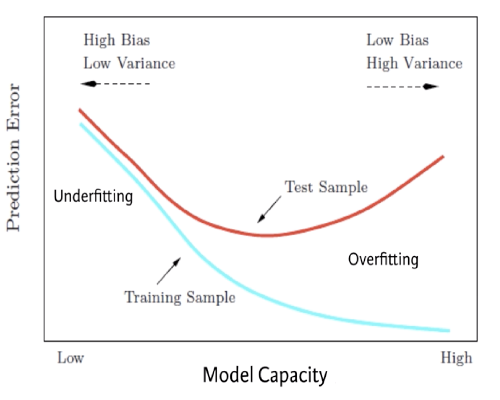

In [52]:
from PIL import Image
image_name1 = 'Photos/fitting.png'
im1 = Image.open(image_name1)
im1_resized = im1.resize((500, 400), Image.NEAREST)
im1_resized.save('Photos/resized_fitting.png')
from IPython.display import Image
Image(filename = "Photos/resized_fitting.png")

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        فرآیند استاندارد برای تعیین مدل بهینه اینه که با یه مدل خیلی ساده شروع کنیم و هی پیچیدگی مدل رو بیشتر کنیم و به ولیدیشن اسکور نگاه کنیم. تا اونجایی که ولیدیشن اسکور داره کم میشه هی پیچیدگی یا ظرفیت مدل رو بیشتر کنیم. اگه دیدم ولیدیشن اسکور داره بیشتر میشه، پیچیدگی مدل رو کم می کنیم
        <br>آخه واقعا لازم نبود که آقای دن بکر بگه. کلا عقل سلیم میگه باید اینکار رو کرد
        <br> مثال زیر مثال خیلی خوبیه. نگاه کن که با چه پیچیدگی ای شروع کرده و هی با استراکچر یا بهتر بگیم با آرچیتکچر مدل بازی می کنه تا به بهترین مدل برسه

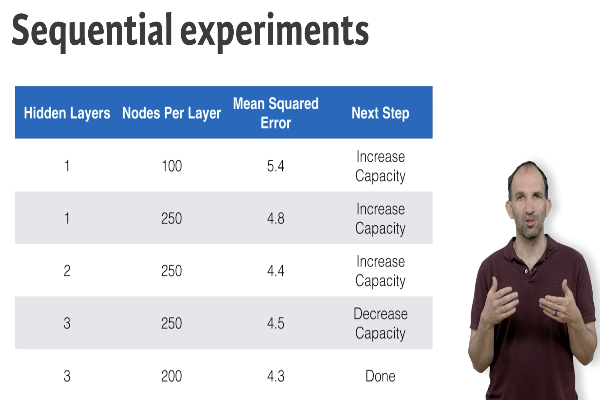

In [54]:
from PIL import Image
image_name2 = 'Photos/sequential.png'
im2 = Image.open(image_name2)
im2_resized = im2.resize((600, 400), Image.NEAREST)
im2_resized.save('Photos/resized_sequential.png')
from IPython.display import Image
Image(filename = "Photos/resized_sequential.png")